## Demographic Data

In [94]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')

full_2015 = pd.read_table('Data/full_2015.csv', delimiter=';')


In [95]:
demo_list = ['DUPERSID','REGION15','AGE15X','SEX','RACEV1X','HISPANX',
            'AFDC15','FOODMN15','FAMINC15','POVLEV15','SSECP15X','MNHLTH53','HIBPDX','CHECK53',
            'CHDDX','ANGIDX','MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON53','CHOLDX','CANCERDX','DIABDX','ARTHDX','ASTHDX',
            'PREGNT53','FLUSHT53','BMINDX53','TMTKUS42','NOHINS42','HELD53X','SICPAY53','UNINS15','INSURC15','NOINSTM',
            'ERTOT15','OBTOTV15']
full_2015 = full_2015[demo_list]
print(full_2015.shape)


(35427, 38)


In [96]:
full_2015_dummies = pd.get_dummies(full_2015, columns=['REGION15','RACEV1X','AFDC15','MNHLTH53','HIBPDX','CHDDX',
                                                       'ANGIDX','MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON53','CHOLDX',
                                                       'CANCERDX','DIABDX','ARTHDX','ASTHDX','PREGNT53',
                                                       'TMTKUS42','NOHINS42','HELD53X','SICPAY53','INSURC15'])

In [97]:
full_2015_dummies = full_2015_dummies.loc[:, ~full_2015_dummies.columns.str.endswith('-1')]
full_2015_dummies = full_2015_dummies.loc[:, ~full_2015_dummies.columns.str.endswith('-2')]
full_2015_dummies = full_2015_dummies.loc[:, ~full_2015_dummies.columns.str.endswith('-9')]
full_2015_dummies = full_2015_dummies.loc[:, ~full_2015_dummies.columns.str.endswith('-8')]
full_2015_dummies = full_2015_dummies.loc[:, ~full_2015_dummies.columns.str.endswith('-7')]

full_2015_dummies = full_2015_dummies.drop(columns=['CHBRON53_2','CHOLDX_2','CANCERDX_2','DIABDX_2','ARTHDX_2','ASTHDX_2',
                                                   'PREGNT53_2','NOHINS42_2','HELD53X_2','SICPAY53_2','ANGIDX_2'])

In [98]:
full_2015_dummies.FOODMN15 = full_2015_dummies.FOODMN15.replace(-1,0)
full_2015_dummies.CHECK53 = full_2015_dummies.CHECK53.replace(-1,0)
full_2015_dummies.FLUSHT53 = full_2015_dummies.FLUSHT53.replace(-1,0)
full_2015_dummies.NOINSTM = full_2015_dummies.NOINSTM.replace(-1,0)

replace = full_2015[['POVLEV15','BMINDX53']]
replace = replace.stack().str.replace(',','.').unstack()
full_2015_dummies = full_2015_dummies.drop(columns=['POVLEV15','BMINDX53'])
full_2015_dummies['POVLEV15'] = replace['POVLEV15']
full_2015_dummies['BMINDX53'] = replace['BMINDX53']

#full_2015_dummies.head(20)

### Explore the Data

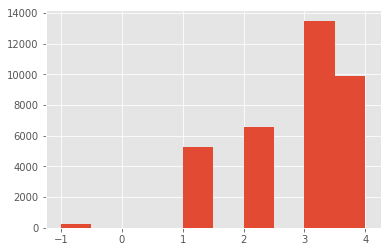

In [99]:
full_2015.REGION15.hist()

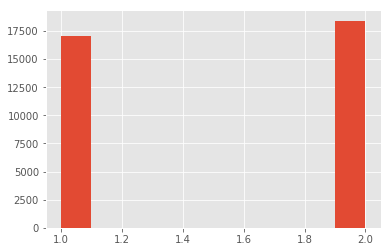

In [100]:
full_2015.SEX.hist()

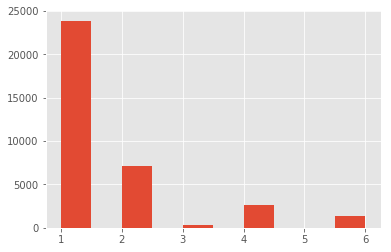

In [101]:
full_2015.RACEV1X.hist()

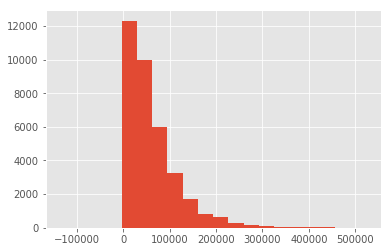

In [102]:
full_2015.FAMINC15.hist(bins=20)

In [103]:
full_2015.UNINS15.value_counts()

2    31193
1     4234
Name: UNINS15, dtype: int64

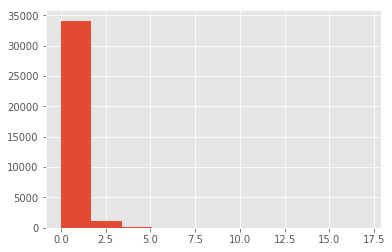

In [104]:
full_2015.ERTOT15.hist()

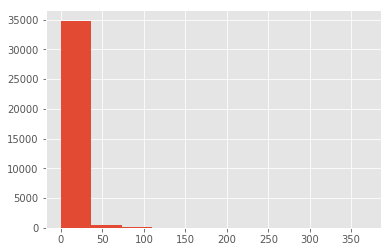

In [105]:
full_2015.OBTOTV15.hist()

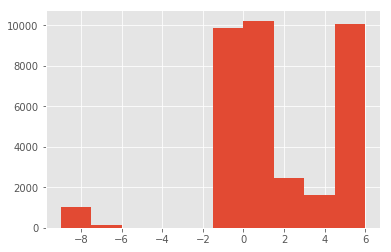

In [106]:
full_2015.FLUSHT53.hist()

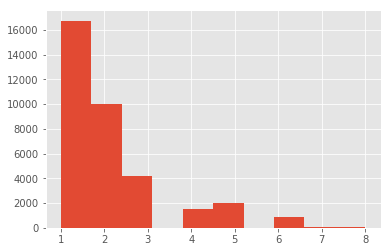

In [107]:
full_2015.INSURC15.hist()

## Medical Conditions

In [108]:
medical_conditions_2015 = pd.read_table('Data/medical_conditions_2015.csv', delimiter=';')


In [109]:
medical_conditions_2015 = medical_conditions_2015.drop(columns=['PANEL','CONDRN','AGEDIAG','ACCDNWRK','CRND1','CRND2',
                                                                'CRND3','CRND4','CRND5','PERWT15F','INJURY',
                                                               'VARSTR','VARPSU','DUID','PID','CONDIDX','Unnamed: 0'])
medical_conditions_2015.head()

,DUPERSID,CONDN,ICD9CODX,ICD9PROX,CCCODEX,HHNUM,IPNUM,OPNUM,OBNUM,ERNUM,RXNUM
0,60001101,11,401,-1,98,0,0,0,1,0,5
1,60001101,21,414,-1,101,0,0,0,2,0,12
2,60001101,31,410,-1,100,0,0,0,1,0,0
3,60001101,41,272,-1,53,0,0,0,0,0,9
4,60001101,51,250,-1,49,0,0,0,1,0,11


In [110]:
len(medical_conditions_2015.DUPERSID.unique())

26621

In [111]:
medical_conditions_2015['flu_flag'] = np.where(medical_conditions_2015.CCCODEX==123,1,0)

In [112]:
medical_conditions_2015.flu_flag.value_counts()

0    121515
1      1712
Name: flu_flag, dtype: int64

In [113]:
flu_DUPERSID = medical_conditions_2015.DUPERSID[medical_conditions_2015['flu_flag']==1]
medical_conditions_2015_grouped = medical_conditions_2015.drop(columns=['CONDN','ICD9CODX','ICD9PROX','CCCODEX','flu_flag'])
medical_conditions_2015_grouped  = medical_conditions_2015_grouped.groupby(['DUPERSID']).sum()
medical_conditions_2015_grouped.head()

,HHNUM,IPNUM,OPNUM,OBNUM,ERNUM,RXNUM
DUPERSID,,,,,,
60001101,0,0,4,26,3,70
60001102,0,0,3,11,5,49
60001103,0,0,0,0,0,0
60001104,0,0,0,0,1,0
60001105,0,1,1,1,0,2


## Prescription Drugs

In [114]:
prescription_drugs_2015 = pd.read_table('Data/prescription_drugs_2015.csv', delimiter=';')


In [115]:
print(prescription_drugs_2015.shape)


(330453, 70)


In [116]:
prescription_drugs_2015 = prescription_drugs_2015.drop(columns=['Unnamed: 0','DUID','PID','DRUGIDX','LINKIDX','PANEL',
                                                               'PURCHRD','RXBEGYRX','RXDRGNAM','RXQUANTY',
                                                                'RXFORM','RXFRMUNT','RXSTRENG','RXSTRUNT','RXDAYSUP',
                                                               'OMTYPE','PHARTP1','PHARTP2','PHARTP3','PHARTP4','PHARTP5',
                                                               'PHARTP6','PHARTP7','PHARTP8','RXFLG','IMPFLAG','PCIMPFLG',
                                                               'INPCFLG','SAMPLE','PREGCAT','TC1','TC1S1','TC1S1_1',
                                                               'TC1S1_2','TC1S2','TC1S2_1','TC1S3','TC1S3_1','TC2','TC2S1',
                                                                'TC2S1_1','TC2S1_2','TC2S2','TC3','TC3S1','TC3S1_1',
                                                                'PERWT15F','VARSTR','VARPSU','RXSF15X','RXMR15X',
                                                                'RXMD15X','RXPV15X','RXVA15X','RXTR15X','RXOF15X',
                                                                'RXSL15X','RXWC15X','RXOT15X','RXOR15X','RXOU15X',
                                                                'RXXP15X'])

In [117]:
len(prescription_drugs_2015.DUPERSID.unique())

19604

In [118]:
prescription_drugs_2015['Tamiflu_flag'] = np.where(prescription_drugs_2015.RXNAME=='TAMIFLU',1,0)

In [119]:
prescription_drugs_2015.Tamiflu_flag.value_counts()

0    330259
1       194
Name: Tamiflu_flag, dtype: int64

In [120]:
TAMIFLU_DUPERSID = prescription_drugs_2015.DUPERSID[prescription_drugs_2015['Tamiflu_flag']==1]

## Table Joining

In [121]:
join1 = full_2015_dummies.join(medical_conditions_2015_grouped,on='DUPERSID')
join1 = join1.fillna(0)

In [122]:
join1['flu_flag'] = np.where(join1.DUPERSID.isin(flu_DUPERSID),1,0)
join1['tamiflu_flag'] = np.where(join1.DUPERSID.isin(TAMIFLU_DUPERSID),1,0)

In [123]:
join1[(join1['flu_flag']==0) & (join1['tamiflu_flag']==1)].shape

(28, 76)

In [124]:
join1[(join1['flu_flag']==1) & (join1['tamiflu_flag']==0)].shape

(1542, 76)

In [125]:
join1[(join1['flu_flag']==1) & (join1['tamiflu_flag']==1)].shape

(153, 76)

In [126]:
join1['Year'] = 2015

## Initial Model Building - just a check w/ single year of data

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y = join1.flu_flag
X = join1.drop(columns=['flu_flag','DUPERSID'])
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42,stratify=y)

In [128]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [129]:
prediction = rf.predict(X_test)
print('Test Accuracy Rate: ',round(accuracy_score(y_test, prediction),3))

Test Accuracy Rate:  0.955


In [130]:
confusion_matrix(y_test, prediction)

array([[16855,    11],
       [  786,    62]])

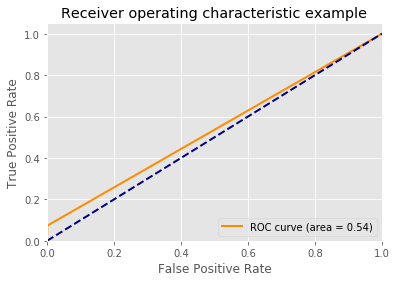

In [131]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Skewed data - no surprise here.  Will have to account for this.

## Other years of data

In [132]:
full_2014 = pd.read_table('Data/full_2014.csv', delimiter=';')
medical_conditions_2014 = pd.read_table('Data/medical_conditions_2014.csv', delimiter=';')
prescription_drugs_2014 = pd.read_table('Data/prescription_drugs_2014.csv', delimiter=';')

full_2013 = pd.read_table('Data/full_2013.csv', delimiter=';')
medical_conditions_2013 = pd.read_table('Data/medical_conditions_2013.csv', delimiter=';')
prescription_drugs_2013 = pd.read_table('Data/prescription_drugs_2013.csv', delimiter=';')

full_2012 = pd.read_table('Data/full_2012.csv', delimiter=';')
medical_conditions_2012 = pd.read_table('Data/medical_conditions_2012.csv', delimiter=';')
prescription_drugs_2012 = pd.read_table('Data/prescription_drugs_2012.csv', delimiter=';')

### Exploration

Text(0.5,1,'Histogram of Sample Population by Region for 2012-2015')

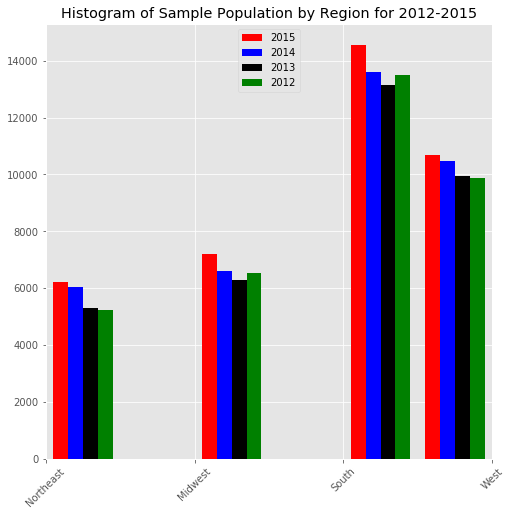

In [133]:
labels = ['2015', '2014', '2013', '2012']
plt.figure(figsize=(8,8))

plt.hist(np.array(pd.DataFrame({'2015':full_2015.REGION15,
                                '2014':full_2014.REGION14,
                                '2013':full_2013.REGION13,
                                '2012':full_2012.REGION12})),
         density=False, histtype='bar', color=['red','blue','black','green'], label=labels)

plt.legend(labels, loc='upper center')
plt.xticks(range(-1,5),['None','','Northeast','Midwest','South','West'], rotation=45)
plt.xlim(1,4)
plt.title('Histogram of Sample Population by Region for 2012-2015')

Text(0.5,1,'Histogram of Sample Population by Race for 2012-2015')

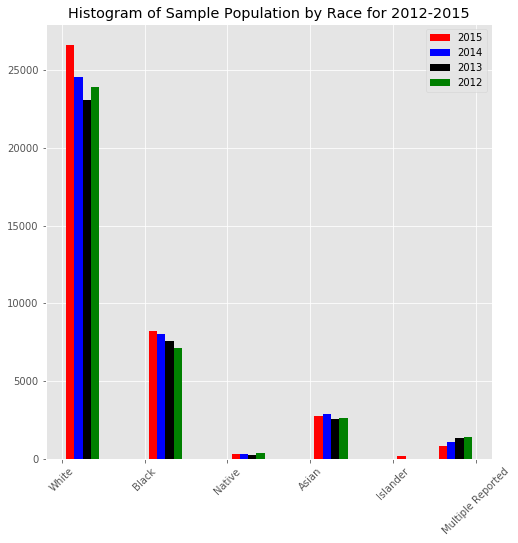

In [134]:
plt.figure(figsize=(8,8))
plt.hist(np.array(pd.DataFrame({'2015':full_2015.RACEV1X,
                                '2014':full_2014.RACEV1X,
                                '2013':full_2013.RACEV1X,
                                '2012':full_2012.RACEV1X})),
         density=False, histtype='bar', color=['red','blue','black','green'], label=labels)

plt.legend(labels)
plt.xticks(range(1,7),['White','Black','Native','Asian','Islander','Multiple Reported'], rotation=45)
plt.title('Histogram of Sample Population by Race for 2012-2015')


Text(0.5,1,'Histogram of Sample Population by Family Income for 2012-2015')

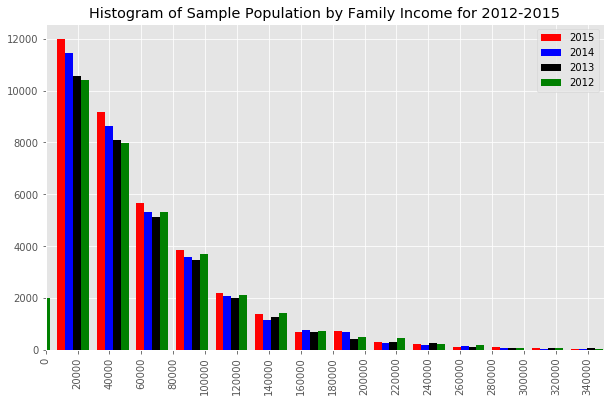

In [135]:
plt.figure(figsize=(10,6))
plt.hist(np.array(pd.DataFrame({'2015':full_2015.FAMINC15,
                                '2014':full_2014.FAMINC14,
                                '2013':full_2013.FAMINC13,
                                '2012':full_2012.FAMINC12})),
         density=False, histtype='bar', color=['red','blue','black','green'], label=labels, bins=20)
plt.xticks(np.arange(0, 350000, step=20000),rotation='vertical')
plt.xlim(0,350000)
plt.legend(labels)
plt.title('Histogram of Sample Population by Family Income for 2012-2015')

Text(0.5,1,'Histogram of Sample Population by Number of Weeks Without Health Insurance for 2012-2015')

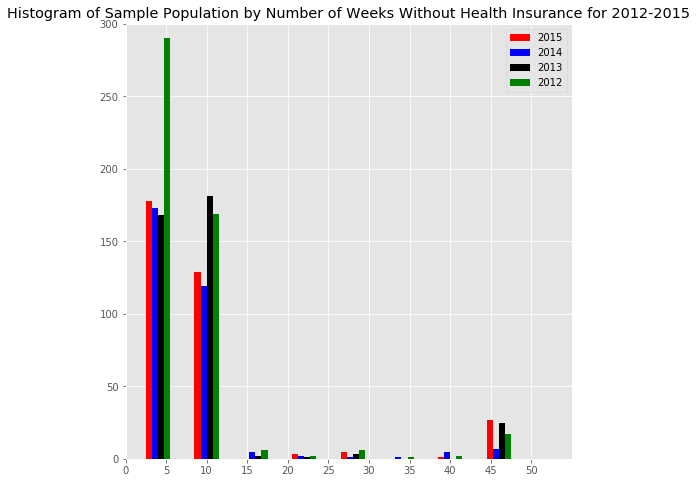

In [136]:
plt.figure(figsize=(8,8))
plt.hist(np.array(pd.DataFrame({'2015':full_2015.NOINSTM,
                                '2014':full_2014.NOINSTM,
                                '2013':full_2013.NOINSTM,
                                '2012':full_2012.NOINSTM})),
         density=False, histtype='bar', color=['red','blue','black','green'], 
         label=labels, rwidth=0.5, bins=10, align='left')

plt.legend(labels)
plt.xticks(range(0,55,5))
plt.xlim(0,55)
plt.ylim(0,300)
plt.title('Histogram of Sample Population by Number of Weeks Without Health Insurance for 2012-2015')

([<matplotlib.axis.XTick at 0x7fe312f45828>,
 <a list of 28 Text xticklabel objects>)

<Figure size 720x720 with 0 Axes>

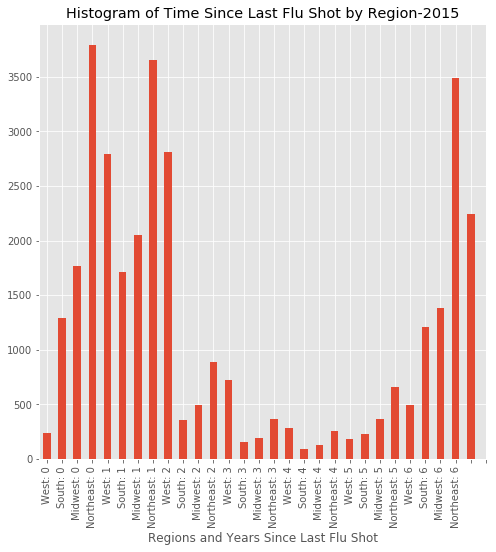

In [137]:
plt.figure(figsize=(10,10))

full_2015[['REGION15',
           'FLUSHT53',
           'DUPERSID']][full_2015['FLUSHT53'] >= -1].groupby(['FLUSHT53',
                                                              'REGION15']).agg('count').plot(kind='bar',
                                                                                                    figsize=(8,8),
                                                                                                    legend=False,
                                                                                                    title='Histogram of Time Since Last Flu Shot by Region-2015')
plt.xlabel('Regions and Years Since Last Flu Shot')
plt.xticks(range(0,30),['West: 0','South: 0','Midwest: 0','Northeast: 0',
           'West: 1','South: 1','Midwest: 1','Northeast: 1',
           'West: 2','South: 2','Midwest: 2','Northeast: 2',
           'West: 3','South: 3','Midwest: 3','Northeast: 3',
           'West: 4','South: 4','Midwest: 4','Northeast: 4',
           'West: 5','South: 5','Midwest: 5','Northeast: 5',
            'West: 6','South: 6','Midwest: 6','Northeast: 6'])

### Cleaning

In [138]:
#2014 cleaning
demo_list_2014 = ['DUPERSID','REGION14','AGE14X','SEX','RACEV1X','HISPANX','AFDC14','FOODMN14','FAMINC14',
                  'POVLEV14','SSECP14X','MNHLTH53','HIBPDX','CHECK53','CHDDX','ANGIDX','MIDX','OHRTDX','STRKDX','EMPHDX',
                  'CHBRON53','CHOLDX','CANCERDX','DIABDX','ARTHDX','ASTHDX','PREGNT53','FLUSHT53','BMINDX53','TMTKUS42',
                  'NOHINS42','HELD53X','SICPAY53','UNINS14','INSURC14','NOINSTM','ERTOT14','OBTOTV14']
full_2014 = full_2014[demo_list_2014]
full_2014_dummies = pd.get_dummies(full_2014, columns=['REGION14','RACEV1X','AFDC14','MNHLTH53','HIBPDX','CHDDX',
                                                       'ANGIDX','MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON53','CHOLDX',
                                                       'CANCERDX','DIABDX','ARTHDX','ASTHDX','PREGNT53',
                                                       'TMTKUS42','NOHINS42','HELD53X','SICPAY53','INSURC14'])
full_2014_dummies = full_2014_dummies.loc[:, ~full_2014_dummies.columns.str.endswith('-1')]
full_2014_dummies = full_2014_dummies.loc[:, ~full_2014_dummies.columns.str.endswith('-2')]
full_2014_dummies = full_2014_dummies.loc[:, ~full_2014_dummies.columns.str.endswith('-9')]
full_2014_dummies = full_2014_dummies.loc[:, ~full_2014_dummies.columns.str.endswith('-8')]
full_2014_dummies = full_2014_dummies.loc[:, ~full_2014_dummies.columns.str.endswith('-7')]

full_2014_dummies = full_2014_dummies.drop(columns=['CHBRON53_2','CHOLDX_2','CANCERDX_2','DIABDX_2','ARTHDX_2','ASTHDX_2',
                                                   'PREGNT53_2','NOHINS42_2','HELD53X_2','SICPAY53_2','ANGIDX_2'])

full_2014_dummies.FOODMN14 = full_2014_dummies.FOODMN14.replace(-1,0)
full_2014_dummies.CHECK53 = full_2014_dummies.CHECK53.replace(-1,0)
full_2014_dummies.FLUSHT53 = full_2014_dummies.FLUSHT53.replace(-1,0)
full_2014_dummies.NOINSTM = full_2014_dummies.NOINSTM.replace(-1,0)

replace = full_2014[['POVLEV14','BMINDX53']]
replace = replace.stack().str.replace(',','.').unstack()
full_2014_dummies = full_2014_dummies.drop(columns=['POVLEV14','BMINDX53'])
full_2014_dummies['POVLEV14'] = replace['POVLEV14']
full_2014_dummies['BMINDX53'] = replace['BMINDX53']

In [139]:
medical_conditions_2014 = medical_conditions_2014.drop(columns=['PANEL','CONDRN','AGEDIAG','ACCDNWRK','CRND1','CRND2',
                                                                'CRND3','CRND4','CRND5','PERWT14F','INJURY',
                                                               'VARSTR','VARPSU','DUID','PID','CONDIDX','Unnamed: 0'])
medical_conditions_2014['flu_flag'] = np.where(medical_conditions_2014.CCCODEX==123,1,0)
flu_DUPERSID_2014 = medical_conditions_2014.DUPERSID[medical_conditions_2014['flu_flag']==1]
medical_conditions_2014_grouped = medical_conditions_2014.drop(columns=['CONDN','ICD9CODX','ICD9PROX','CCCODEX','flu_flag'])
medical_conditions_2014_grouped  = medical_conditions_2014_grouped.groupby(['DUPERSID']).sum()


In [140]:
prescription_drugs_2014 = prescription_drugs_2014.drop(columns=['Unnamed: 0','DUID','PID','DRUGIDX','LINKIDX','PANEL',
                                                               'PURCHRD','RXBEGYRX','RXDRGNAM','RXQUANTY',
                                                                'RXFORM','RXFRMUNT','RXSTRENG','RXSTRUNT','RXDAYSUP',
                                                               'OMTYPE','PHARTP1','PHARTP2','PHARTP3','PHARTP4','PHARTP5',
                                                               'PHARTP6','PHARTP7','PHARTP8','RXFLG','IMPFLAG','PCIMPFLG',
                                                               'INPCFLG','SAMPLE','PREGCAT','TC1','TC1S1','TC1S1_1',
                                                               'TC1S1_2','TC1S2','TC1S2_1','TC1S3','TC1S3_1','TC2','TC2S1',
                                                                'TC2S1_1','TC2S1_2','TC2S2','TC3','TC3S1','TC3S1_1',
                                                                'PERWT14F','VARSTR','VARPSU','RXSF14X','RXMR14X',
                                                                'RXMD14X','RXPV14X','RXVA14X','RXTR14X','RXOF14X',
                                                                'RXSL14X','RXWC14X','RXOT14X','RXOR14X','RXOU14X',
                                                                'RXXP14X'])
prescription_drugs_2014['Tamiflu_flag'] = np.where(prescription_drugs_2014.RXNAME=='TAMIFLU',1,0)
TAMIFLU_DUPERSID_2014 = prescription_drugs_2014.DUPERSID[prescription_drugs_2014['Tamiflu_flag']==1]

In [141]:
#2013 cleaning
demo_list_2013 = ['DUPERSID','REGION13','AGE13X','SEX','RACEV1X','HISPANX','AFDC13','FOODMN13','FAMINC13',
                  'POVLEV13','SSECP13X','MNHLTH53','HIBPDX','CHECK53','CHDDX','ANGIDX','MIDX','OHRTDX','STRKDX','EMPHDX',
                  'CHBRON53','CHOLDX','CANCERDX','DIABDX','ARTHDX','ASTHDX','PREGNT53','FLUSHT53','BMINDX53','TMTKUS42',
                  'NOHINS42','HELD53X','SICPAY53','UNINS13','INSURC13','NOINSTM','ERTOT13','OBTOTV13']
full_2013 = full_2013[demo_list_2013]
full_2013_dummies = pd.get_dummies(full_2013, columns=['REGION13','RACEV1X','AFDC13','MNHLTH53','HIBPDX','CHDDX',
                                                       'ANGIDX','MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON53','CHOLDX',
                                                       'CANCERDX','DIABDX','ARTHDX','ASTHDX','PREGNT53',
                                                       'TMTKUS42','NOHINS42','HELD53X','SICPAY53','INSURC13'])
full_2013_dummies = full_2013_dummies.loc[:, ~full_2013_dummies.columns.str.endswith('-1')]
full_2013_dummies = full_2013_dummies.loc[:, ~full_2013_dummies.columns.str.endswith('-2')]
full_2013_dummies = full_2013_dummies.loc[:, ~full_2013_dummies.columns.str.endswith('-9')]
full_2013_dummies = full_2013_dummies.loc[:, ~full_2013_dummies.columns.str.endswith('-8')]
full_2013_dummies = full_2013_dummies.loc[:, ~full_2013_dummies.columns.str.endswith('-7')]

full_2013_dummies = full_2013_dummies.drop(columns=['CHBRON53_2','CHOLDX_2','CANCERDX_2','DIABDX_2','ARTHDX_2','ASTHDX_2',
                                                   'PREGNT53_2','NOHINS42_2','HELD53X_2','SICPAY53_2','ANGIDX_2'])

full_2013_dummies.FOODMN13 = full_2013_dummies.FOODMN13.replace(-1,0)
full_2013_dummies.CHECK53 = full_2013_dummies.CHECK53.replace(-1,0)
full_2013_dummies.FLUSHT53 = full_2013_dummies.FLUSHT53.replace(-1,0)
full_2013_dummies.NOINSTM = full_2013_dummies.NOINSTM.replace(-1,0)

replace = full_2013[['POVLEV13','BMINDX53']]
replace = replace.stack().str.replace(',','.').unstack()
full_2013_dummies = full_2013_dummies.drop(columns=['POVLEV13','BMINDX53'])
full_2013_dummies['POVLEV13'] = replace['POVLEV13']
full_2013_dummies['BMINDX53'] = replace['BMINDX53']

In [142]:
medical_conditions_2013 = medical_conditions_2013.drop(columns=['PANEL','CONDRN','AGEDIAG','ACCDNWRK','CRND1','CRND2',
                                                                'CRND3','CRND4','CRND5','PERWT13F','INJURY',
                                                               'VARSTR','VARPSU','DUID','PID','CONDIDX','Unnamed: 0'])
medical_conditions_2013['flu_flag'] = np.where(medical_conditions_2013.CCCODEX==123,1,0)
flu_DUPERSID_2013 = medical_conditions_2013.DUPERSID[medical_conditions_2013['flu_flag']==1]
medical_conditions_2013_grouped = medical_conditions_2013.drop(columns=['CONDN','ICD9CODX','ICD9PROX','CCCODEX','flu_flag'])
medical_conditions_2013_grouped  = medical_conditions_2013_grouped.groupby(['DUPERSID']).sum()

In [143]:
prescription_drugs_2013 = prescription_drugs_2013.drop(columns=['Unnamed: 0','DUID','PID','DRUGIDX','LINKIDX','PANEL',
                                                               'PURCHRD','RXBEGYRX','RXDRGNAM','RXQUANTY',
                                                                'RXFORM','RXFRMUNT','RXSTRENG','RXSTRUNT','RXDAYSUP',
                                                                'PHARTP1','PHARTP2','PHARTP3','PHARTP4','PHARTP5',
                                                               'PHARTP6','PHARTP7','PHARTP8','RXFLG','IMPFLAG','PCIMPFLG',
                                                               'INPCFLG','SAMPLE','PREGCAT','TC1','TC1S1','TC1S1_1',
                                                               'TC1S1_2','TC1S2','TC1S2_1','TC1S3','TC1S3_1','TC2','TC2S1',
                                                                'TC2S1_1','TC2S1_2','TC2S2','TC3','TC3S1','TC3S1_1',
                                                                'PERWT13F','VARSTR','VARPSU','RXSF13X','RXMR13X',
                                                                'RXMD13X','RXPV13X','RXVA13X','RXTR13X','RXOF13X',
                                                                'RXSL13X','RXWC13X','RXOT13X','RXOR13X','RXOU13X',
                                                                'RXXP13X','CLMOMFLG'])
prescription_drugs_2013['Tamiflu_flag'] = np.where(prescription_drugs_2013.RXNAME=='TAMIFLU',1,0)
TAMIFLU_DUPERSID_2013 = prescription_drugs_2013.DUPERSID[prescription_drugs_2013['Tamiflu_flag']==1]

In [144]:
#2012 cleaning
demo_list_2012 = ['DUPERSID','REGION12','AGE12X','SEX','RACEV1X','HISPANX','AFDC12','FOODMN12','FAMINC12',
                  'POVLEV12','SSECP12X','MNHLTH53','HIBPDX','CHECK53','CHDDX','ANGIDX','MIDX','OHRTDX','STRKDX','EMPHDX',
                  'CHBRON53','CHOLDX','CANCERDX','DIABDX','ARTHDX','ASTHDX','PREGNT53','FLUSHT53','BMINDX53','TMTKUS42',
                  'NOHINS42','HELD53X','SICPAY53','UNINS12','INSURC12','NOINSTM','ERTOT12','OBTOTV12']
full_2012 = full_2012[demo_list_2012]
full_2012_dummies = pd.get_dummies(full_2012, columns=['REGION12','RACEV1X','AFDC12','MNHLTH53','HIBPDX','CHDDX',
                                                       'ANGIDX','MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON53','CHOLDX',
                                                       'CANCERDX','DIABDX','ARTHDX','ASTHDX','PREGNT53',
                                                       'TMTKUS42','NOHINS42','HELD53X','SICPAY53','INSURC12'])
full_2012_dummies = full_2012_dummies.loc[:, ~full_2012_dummies.columns.str.endswith('-1')]
full_2012_dummies = full_2012_dummies.loc[:, ~full_2012_dummies.columns.str.endswith('-2')]
full_2012_dummies = full_2012_dummies.loc[:, ~full_2012_dummies.columns.str.endswith('-9')]
full_2012_dummies = full_2012_dummies.loc[:, ~full_2012_dummies.columns.str.endswith('-8')]
full_2012_dummies = full_2012_dummies.loc[:, ~full_2012_dummies.columns.str.endswith('-7')]

full_2012_dummies = full_2012_dummies.drop(columns=['CHBRON53_2','CHOLDX_2','CANCERDX_2','DIABDX_2','ARTHDX_2','ASTHDX_2',
                                                   'PREGNT53_2','NOHINS42_2','HELD53X_2','SICPAY53_2','RACEV1X_5','ANGIDX_2'])

full_2012_dummies.FOODMN12 = full_2012_dummies.FOODMN12.replace(-1,0)
full_2012_dummies.CHECK53 = full_2012_dummies.CHECK53.replace(-1,0)
full_2012_dummies.FLUSHT53 = full_2012_dummies.FLUSHT53.replace(-1,0)
full_2012_dummies.NOINSTM = full_2012_dummies.NOINSTM.replace(-1,0)

replace = full_2012[['POVLEV12','BMINDX53']]
replace = replace.stack().str.replace(',','.').unstack()
full_2012_dummies = full_2012_dummies.drop(columns=['POVLEV12','BMINDX53'])
full_2012_dummies['POVLEV12'] = replace['POVLEV12']
full_2012_dummies['BMINDX53'] = replace['BMINDX53']

In [145]:
medical_conditions_2012 = medical_conditions_2012.drop(columns=['PANEL','CONDRN','AGEDIAG','ACCDNWRK','CRND1','CRND2',
                                                                'CRND3','CRND4','CRND5','PERWT12F','INJURY',
                                                               'VARSTR','VARPSU','DUID','PID','CONDIDX','Unnamed: 0'])
medical_conditions_2012['flu_flag'] = np.where(medical_conditions_2012.CCCODEX==123,1,0)
flu_DUPERSID_2012 = medical_conditions_2012.DUPERSID[medical_conditions_2012['flu_flag']==1]
medical_conditions_2012_grouped = medical_conditions_2012.drop(columns=['CONDN','ICD9CODX','ICD9PROX','CCCODEX','flu_flag',
                                                                        'ACCDENTD','ACCDENTM','ACCDENTY','ACCDNJAN',
                                                                        'INBEDFLG','MISSSCHL','MISSWORK','REMISSN'])
medical_conditions_2012_grouped  = medical_conditions_2012_grouped.groupby(['DUPERSID']).sum()

In [146]:
prescription_drugs_2012 = prescription_drugs_2012.drop(columns=['Unnamed: 0','DUID','PID','DRUGIDX','LINKIDX','PANEL',
                                                               'PURCHRD','RXBEGYRX','RXQUANTY',
                                                                'RXFORM','RXFRMUNT','RXSTRENG','RXSTRUNT','RXDAYSUP',
                                                                'PHARTP1','PHARTP2','PHARTP3','PHARTP4','PHARTP5',
                                                               'PHARTP6','PHARTP7','PHARTP8','RXFLG','IMPFLAG','PCIMPFLG',
                                                               'INPCFLG','SAMPLE','PREGCAT','TC1','TC1S1','TC1S1_1',
                                                               'TC1S1_2','TC1S2','TC1S2_1','TC1S3','TC1S3_1','TC2','TC2S1',
                                                                'TC2S1_1','TC2S1_2','TC2S2','TC3','TC3S1','TC3S1_1',
                                                                'PERWT12F','VARSTR','VARPSU','RXSF12X','RXMR12X',
                                                                'RXMD12X','RXPV12X','RXVA12X','RXTR12X','RXOF12X',
                                                                'RXSL12X','RXWC12X','RXOT12X','RXOR12X','RXOU12X',
                                                                'RXXP12X','CLMOMFLG', 'PHARTP10', 'PHARTP9', 'RXBEGDD', 
                                                                'RXICD1X', 'RXICD2X', 'RXICD3X'])
prescription_drugs_2012['Tamiflu_flag'] = np.where(prescription_drugs_2012.RXNAME=='TAMIFLU',1,0)
TAMIFLU_DUPERSID_2012 = prescription_drugs_2012.DUPERSID[prescription_drugs_2012['Tamiflu_flag']==1]

### Year by Year Dataframe Joining

In [147]:
print(full_2015_dummies.shape)
print(full_2014_dummies.shape)
print(full_2013_dummies.shape)
print(full_2012_dummies.shape)

(35427, 68)
(34875, 68)
(36940, 68)
(38974, 68)


In [148]:
print(medical_conditions_2015_grouped.shape)
print(medical_conditions_2014_grouped.shape)
print(medical_conditions_2013_grouped.shape)
print(medical_conditions_2012_grouped.shape)

(26621, 6)
(25870, 6)
(28576, 6)
(29537, 6)


In [149]:
print(prescription_drugs_2015.shape)
print(prescription_drugs_2014.shape)
print(prescription_drugs_2013.shape)
print(prescription_drugs_2012.shape)

(330453, 9)
(319467, 9)
(327557, 9)
(324744, 9)


In [150]:
join2 = full_2014_dummies.join(medical_conditions_2014_grouped,on='DUPERSID')
join2 = join2.fillna(0)

join2['flu_flag'] = np.where(join2.DUPERSID.isin(flu_DUPERSID_2014),1,0)
join2['tamiflu_flag'] = np.where(join2.DUPERSID.isin(TAMIFLU_DUPERSID_2014),1,0)

join2['Year'] = 2014

In [151]:
join3 = full_2013_dummies.join(medical_conditions_2013_grouped,on='DUPERSID')
join3 = join3.fillna(0)

join3['flu_flag'] = np.where(join3.DUPERSID.isin(flu_DUPERSID_2013),1,0)
join3['tamiflu_flag'] = np.where(join3.DUPERSID.isin(TAMIFLU_DUPERSID_2013),1,0)

join3['Year'] = 2013

In [152]:
join4 = full_2012_dummies.join(medical_conditions_2012_grouped,on='DUPERSID')
join4 = join4.fillna(0)

join4['flu_flag'] = np.where(join4.DUPERSID.isin(flu_DUPERSID_2012),1,0)
join4['tamiflu_flag'] = np.where(join4.DUPERSID.isin(TAMIFLU_DUPERSID_2012),1,0)

join4['Year'] = 2012

In [153]:
print("2015 No flu but Tamiflu: ",join1[(join1['flu_flag']==0) & (join1['tamiflu_flag']==1)].shape[0])
print("2014 No flu but Tamiflu: ",join2[(join2['flu_flag']==0) & (join2['tamiflu_flag']==1)].shape[0])
print("2013 No flu but Tamiflu: ",join3[(join3['flu_flag']==0) & (join3['tamiflu_flag']==1)].shape[0])
print("2012 No flu but Tamiflu: ",join4[(join4['flu_flag']==0) & (join4['tamiflu_flag']==1)].shape[0])
print()      

print("2015 flu but no Tamiflu: ",join1[(join1['flu_flag']==1) & (join1['tamiflu_flag']==0)].shape[0])
print("2014 flu but no Tamiflu: ",join2[(join2['flu_flag']==1) & (join2['tamiflu_flag']==0)].shape[0])
print("2013 flu but no Tamiflu: ",join3[(join3['flu_flag']==1) & (join3['tamiflu_flag']==0)].shape[0])
print("2012 flu but no Tamiflu: ",join4[(join4['flu_flag']==1) & (join4['tamiflu_flag']==0)].shape[0])
print()
print("2015 flu and Tamiflu: ",join1[(join1['flu_flag']==1) & (join1['tamiflu_flag']==1)].shape[0])
print("2014 flu and Tamiflu: ",join2[(join2['flu_flag']==1) & (join2['tamiflu_flag']==1)].shape[0])
print("2013 flu and Tamiflu: ",join3[(join3['flu_flag']==1) & (join3['tamiflu_flag']==1)].shape[0])
print("2012 flu and Tamiflu: ",join4[(join4['flu_flag']==1) & (join4['tamiflu_flag']==1)].shape[0])

2015 No flu but Tamiflu:  28
2014 No flu but Tamiflu:  38
2013 No flu but Tamiflu:  23
2012 No flu but Tamiflu:  25

2015 flu but no Tamiflu:  1542
2014 flu but no Tamiflu:  1606
2013 flu but no Tamiflu:  3060
2012 flu but no Tamiflu:  3025

2015 flu and Tamiflu:  153
2014 flu and Tamiflu:  197
2013 flu and Tamiflu:  154
2012 flu and Tamiflu:  86


### Rename Column

In [154]:
cols_to_rename1 = sorted(list(set(join1.columns) - set(join2.columns)))
cols_to_rename2 = sorted(list(set(join2.columns) - set(join1.columns)))
cols_to_rename3 = sorted(list(set(join3.columns) - set(join1.columns)))
cols_to_rename4 = sorted(list(set(join4.columns) - set(join1.columns)))

dict1 = dict(zip(cols_to_rename2, cols_to_rename1))
dict2 = dict(zip(cols_to_rename3, cols_to_rename1))
dict3 = dict(zip(cols_to_rename4, cols_to_rename1))

join2 = join2.rename(index = str, columns=dict1)
join3 = join3.rename(index = str, columns=dict2)
join4 = join4.rename(index = str, columns=dict3)

## Incorporating Google Trends data for each year

Values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term.

Note: A higher value means a higher proportion of all queries, not a higher absolute query count. So a tiny state where 80% of the queries are for "bananas" will get twice the score of a giant country where only 40% of the queries are for "bananas".

In [155]:
northeast1 = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey','New York', 
             'Pennsylvania', 'Rhode Island', 'Vermont']
midwest2 = ['Indiana', 'Illinois', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri','Nebraska', 'North Dakota', 
            'Ohio', 'South Dakota', 'Wisconsin']
south3 = ['Alabama', 'Arkansas', 'Delaware, District of Columbia', 'Florida','Georgia', 'Kentucky', 'Louisiana', 
          'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 
          'Texas', 'Virginia', 'West Virginia']
west4 = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 
         'Oregon', 'Utah', 'Washington', 'Wyoming' ]
trends_2012 = pd.read_csv('Data/trends_2012.csv', skiprows=2)
trends_2013 = pd.read_csv('Data/trends_2013.csv', skiprows=2)
trends_2014 = pd.read_csv('Data/trends_2014.csv', skiprows=2)
trends_2015 = pd.read_csv('Data/trends_2015.csv', skiprows=2)

In [156]:
northeast_2012 = trends_2012[trends_2012['Region'].isin(northeast1)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2012)'].mean()
northeast_2013 = trends_2013[trends_2013['Region'].isin(northeast1)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2013)'].mean()
northeast_2014 = trends_2014[trends_2014['Region'].isin(northeast1)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2014)'].mean()
northeast_2015 = trends_2015[trends_2015['Region'].isin(northeast1)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2015)'].mean()

northeast = [northeast_2012, northeast_2013, northeast_2014, northeast_2015]

In [157]:
midwest_2012 = trends_2012[trends_2012['Region'].isin(midwest2)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2012)'].mean()
midwest_2013 = trends_2013[trends_2013['Region'].isin(midwest2)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2013)'].mean()
midwest_2014 = trends_2014[trends_2014['Region'].isin(midwest2)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2014)'].mean()
midwest_2015 = trends_2015[trends_2015['Region'].isin(midwest2)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2015)'].mean()

midwest = [midwest_2012, midwest_2013, midwest_2014, midwest_2015]

In [158]:
south_2012 = trends_2012[trends_2012['Region'].isin(south3)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2012)'].mean()
south_2013 = trends_2013[trends_2013['Region'].isin(south3)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2013)'].mean()
south_2014 = trends_2014[trends_2014['Region'].isin(south3)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2014)'].mean()
south_2015 = trends_2015[trends_2015['Region'].isin(south3)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2015)'].mean()

south = [south_2012, south_2013,south_2014, south_2015]

In [159]:
west_2012 = trends_2012[trends_2012['Region'].isin(west4)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2012)'].mean()
west_2013 = trends_2013[trends_2013['Region'].isin(west4)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2013)'].mean()
west_2014 = trends_2014[trends_2014['Region'].isin(west4)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2014)'].mean()
west_2015 = trends_2015[trends_2015['Region'].isin(west4)]['influenza + flu + flu symptoms + flu treatments + flu remedies: (2015)'].mean()

west = [west_2012, west_2013, west_2014, west_2015]

In [160]:
year = [2012,2013,2014,2015]

trend_regions = pd.DataFrame(year, columns=['Year'])
trend_regions['1'] = [x/100 for x in northeast]
trend_regions['2'] = [x/100 for x in midwest]
trend_regions['3'] = [x/100 for x in south]
trend_regions['4'] =[x/100 for x in west]
trend_regions

,Year,1,2,3,4
0,2012,0.652222,0.756667,0.712667,0.645385
1,2013,0.772222,0.820833,0.792667,0.710000
2,2014,0.702222,0.854167,0.800000,0.700000
3,2015,0.508889,0.630000,0.532667,0.503077


In [161]:
flu_region_2015 = pd.Series()
for row in range(join1.shape[0]):
    if join1['REGION15_1'][row]==1:
        flu_region_2015=flu_region_2015.append(trend_regions[3:]['1'], ignore_index=True)
    elif join1['REGION15_2'][row]==1:
        flu_region_2015=flu_region_2015.append(trend_regions[3:]['2'], ignore_index=True)
    elif join1['REGION15_3'][row]==1:
        flu_region_2015=flu_region_2015.append(trend_regions[3:]['3'], ignore_index=True)
    elif join1['REGION15_4'][row]==1:
        flu_region_2015=flu_region_2015.append(trend_regions[3:]['4'], ignore_index=True)
    else:
        flu_region_2015[row]=0
        
join1['flu_region'] = flu_region_2015.values       

In [162]:
flu_region_2014 = pd.Series()
for row in range(join2.shape[0]):
    if join2['REGION15_1'][row]==1:
        flu_region_2014=flu_region_2014.append(trend_regions[2:3]['1'], ignore_index=True)
    elif join2['REGION15_2'][row]==1:
        flu_region_2014=flu_region_2014.append(trend_regions[2:3]['2'], ignore_index=True)
    elif join2['REGION15_3'][row]==1:
        flu_region_2014=flu_region_2014.append(trend_regions[2:3]['3'], ignore_index=True)
    elif join2['REGION15_4'][row]==1:
        flu_region_2014=flu_region_2014.append(trend_regions[2:3]['4'], ignore_index=True)
    else:
        flu_region_2014[row]=0
        
join2['flu_region'] = flu_region_2014.values

In [163]:
flu_region_2013 = pd.Series()
for row in range(join3.shape[0]):
    if join3['REGION15_1'][row]==1:
        flu_region_2013=flu_region_2013.append(trend_regions[1:2]['1'], ignore_index=True)
    elif join3['REGION15_2'][row]==1:
        flu_region_2013=flu_region_2013.append(trend_regions[1:2]['2'], ignore_index=True)
    elif join3['REGION15_3'][row]==1:
        flu_region_2013=flu_region_2013.append(trend_regions[1:2]['3'], ignore_index=True)
    elif join3['REGION15_4'][row]==1:
        flu_region_2013=flu_region_2013.append(trend_regions[1:2]['4'], ignore_index=True)
    else:
        flu_region_2013[row]=0
        
join3['flu_region'] = flu_region_2013.values

In [164]:
flu_region_2012 = pd.Series()
for row in range(join4.shape[0]):
    if join4['REGION15_1'][row]==1:
        flu_region_2012=flu_region_2012.append(trend_regions[0:1]['1'], ignore_index=True)
    elif join4['REGION15_2'][row]==1:
        flu_region_2012=flu_region_2012.append(trend_regions[0:1]['2'], ignore_index=True)
    elif join4['REGION15_3'][row]==1:
        flu_region_2012=flu_region_2012.append(trend_regions[0:1]['3'], ignore_index=True)
    elif join4['REGION15_4'][row]==1:
        flu_region_2012=flu_region_2012.append(trend_regions[0:1]['4'], ignore_index=True)
    else:
        flu_region_2012[row]=0
        
join4['flu_region'] = flu_region_2012.values

## Joining  years together

In [165]:
training = join2.append(join3, ignore_index=True)
training = training.append(join4, ignore_index=True)

testing = join1

### Imputations

In [166]:
def imputer(df, numeric_columns, vals):
    """This function checks the columns types for each column and depending on the type will impute 
    values from the given list of values.  
    Categorical = most frequent
    Numeric = mean
    """
    for col in df.columns:
        for val in vals:
            if col in numeric_columns:
                df[col] = df[col].replace(val,df[col].mean())
            else:
                df[col] = df[col].replace(val,df[col].value_counts().index[0])
    return df
        

In [167]:
training['POVLEV15'] = training['POVLEV15'].astype('float64')
training['BMINDX53'] = training['BMINDX53'].astype('float64')

numeric = ['AGE15X','FOODMN15','FAMINC15','SSECP15X','FLUSHT53','OBTOTV15','POVLEV15','BMINDX53',
           'HHNUM','IPNUM','OPNUM','OBNUM','ERNUM','RXNUM']
vals = [-8,-9]
impute = imputer(training,numeric,vals)

## Model Investigations

### Random Forest and Gradient Boosting

In [168]:
randomforest = RandomForestClassifier(n_estimators=200,criterion='entropy',n_jobs=-1)

ytrain = training.flu_flag
xtrain = training.drop(columns=['flu_flag','DUPERSID'])
ytest = testing.flu_flag
xtest = testing.drop(columns=['flu_flag','DUPERSID'])

In [169]:
randomforest.fit(xtrain, ytrain)
predictions = randomforest.predict(xtest)

In [170]:
print('Test Accuracy Rate: ',round(accuracy_score(ytest, predictions),3))
confusion_matrix(ytest, predictions)

Test Accuracy Rate:  0.956


array([[33710,    22],
       [ 1553,   142]])

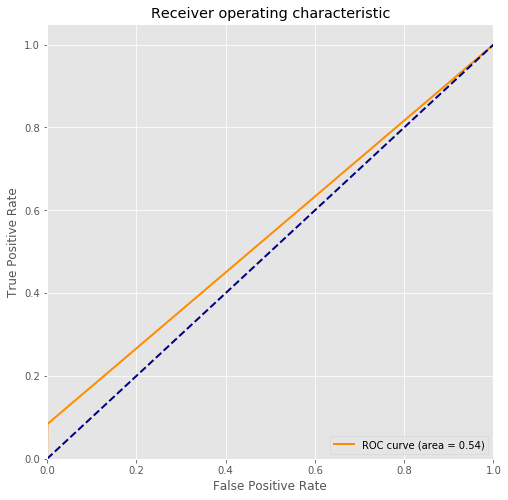

In [171]:
fpr, tpr, _ = roc_curve(ytest, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5,1,'Variable Importance from Random Forest Model')

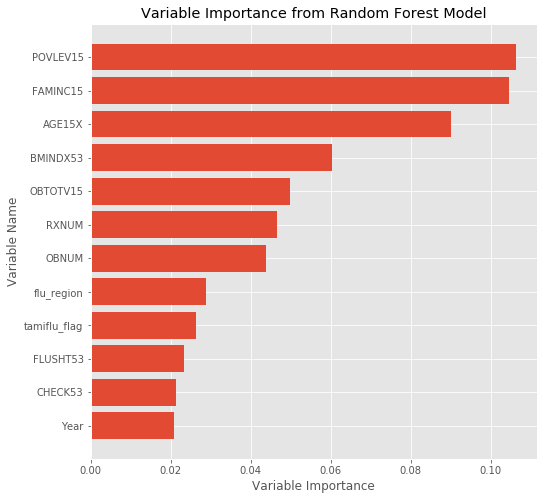

In [172]:
var_importance = pd.DataFrame(xtrain.columns)
var_importance['Importance'] = randomforest.feature_importances_
var_import = dict(zip(var_importance.sort_values(by=['Importance'], ascending=False)[0], 
                      var_importance.sort_values(by=['Importance'], ascending=False).Importance))
values = list(var_import.values())[0:12]
labels = list(var_import.keys())[0:12]

plt.figure(figsize=(8,8))
plt.barh(range(12),values[::-1])
plt.yticks(range(12),labels[::-1])
plt.ylabel('Variable Name')
plt.xlabel('Variable Importance')
plt.title('Variable Importance from Random Forest Model')


In [173]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboosting = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=5, )
gradientboosting.fit(xtrain, ytrain)

predictions2 = gradientboosting.predict(xtest)
print('Test Accuracy Rate: ',round(accuracy_score(ytest, predictions2),3))
confusion_matrix(ytest, predictions2)

Test Accuracy Rate:  0.936


array([[33105,   627],
       [ 1650,    45]])

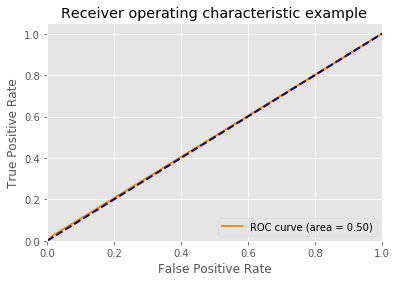

In [174]:
fpr, tpr, _ = roc_curve(ytest, predictions2)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [175]:
var_importance2 = pd.DataFrame(xtrain.columns)
var_importance2['Importance'] = gradientboosting.feature_importances_
var_importance2.sort_values(by='Importance', ascending=False).head(10)

,0,Importance
75,flu_region,0.579039
73,tamiflu_flag,0.163261
0,AGE15X,0.067673
57,INSURC15_1,0.035319
4,FAMINC15,0.026305
65,POVLEV15,0.024971
11,OBTOTV15,0.022055
70,OBNUM,0.018742
47,PREGNT53_1,0.014893
43,CANCERDX_1,0.009837


### Try upsampling

In [176]:
from sklearn.utils import resample

majority = training[training.flu_flag==0]
minority = training[training.flu_flag==1]

# sample with replacement to be 10% of majority class
flu_upsampled = resample(minority, replace=True,n_samples=20000,random_state=123)

flu_upsampled_training = pd.concat([majority, flu_upsampled])

flu_upsampled_training.flu_flag.value_counts()
upsampled_ytrain = flu_upsampled_training.flu_flag
upsampled_xtrain = flu_upsampled_training.drop(columns=['flu_flag','DUPERSID'])

In [177]:


upsampled_random_forest = RandomForestClassifier(n_estimators=200,criterion='entropy',n_jobs=-1)
upsampled_random_forest.fit(upsampled_xtrain, upsampled_ytrain)
upsampled_predictions = upsampled_random_forest.predict(xtest)

Test Accuracy Rate:  0.956


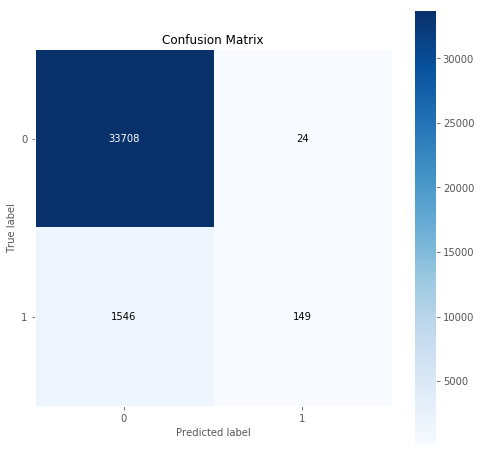

In [178]:
print('Test Accuracy Rate: ',round(accuracy_score(ytest, upsampled_predictions),3))
confusion_matrix(ytest, upsampled_predictions)
skplt.metrics.plot_confusion_matrix(testing.flu_flag, upsampled_predictions, figsize=(8, 8))

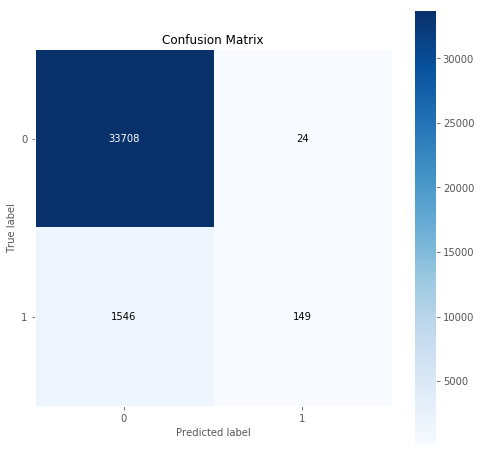

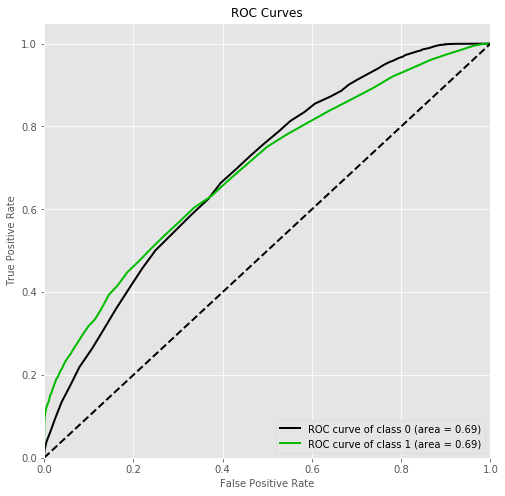

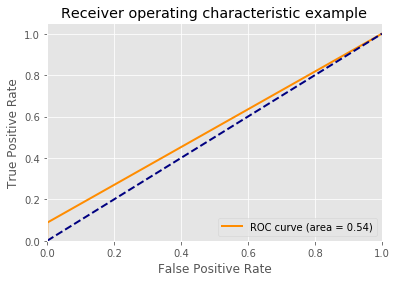

In [179]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(testing.flu_flag, upsampled_predictions, figsize=(8, 8))
upsampled_predictProb = upsampled_random_forest.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, upsampled_predictProb, curves=('each_class') ,figsize=(8, 8))
fpr, tpr, _ = roc_curve(ytest, upsampled_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [180]:
upsampled_gradientboosting = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=5 )
upsampled_gradientboosting.fit(upsampled_xtrain, upsampled_ytrain)

upsampled_predictions2 = upsampled_gradientboosting.predict(xtest)
print('Test Accuracy Rate: ',round(accuracy_score(ytest, upsampled_predictions2),3))
confusion_matrix(ytest, upsampled_predictions2)

Test Accuracy Rate:  0.92


array([[32400,  1332],
       [ 1490,   205]])

In [181]:
var_importance_upsample = pd.DataFrame(xtrain.columns)
var_importance_upsample['Importance'] = upsampled_gradientboosting.feature_importances_
var_importance_upsample.sort_values(by='Importance', ascending=False).head(10)

,0,Importance
65,POVLEV15,0.200076
4,FAMINC15,0.180548
0,AGE15X,0.074581
66,BMINDX53,0.065167
72,RXNUM,0.037240
70,OBNUM,0.036324
75,flu_region,0.036266
11,OBTOTV15,0.034801
5,SSECP15X,0.018070
7,FLUSHT53,0.017541


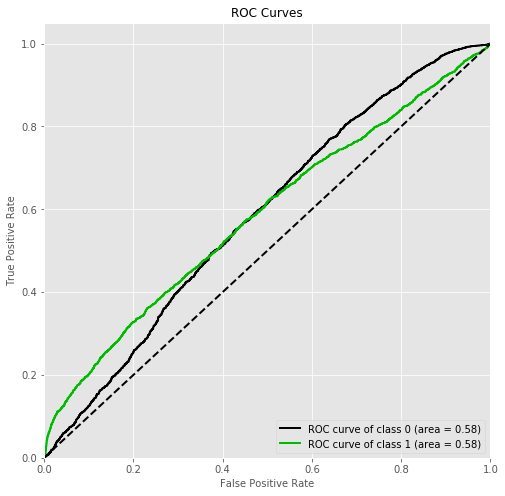

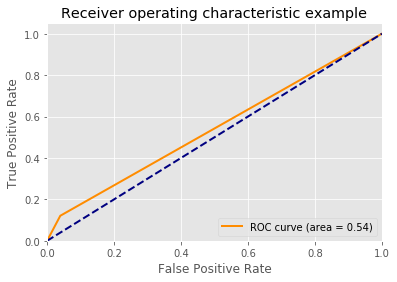

In [182]:
upsampled_predictProb2 = upsampled_gradientboosting.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, upsampled_predictProb2,  curves=('each_class'), figsize=(8, 8))
fpr, tpr, _ = roc_curve(ytest, upsampled_predictions2)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Try SMOTE and ADASYN

In [183]:
from imblearn.over_sampling import ADASYN, SMOTE

smoteTrainX, smoteTrainY = SMOTE(n_jobs=-1).fit_sample(training.drop(columns=['flu_flag','DUPERSID']), training.flu_flag)
adasynTrainX, adasynTrainY = ADASYN(n_jobs=-1).fit_sample(training.drop(columns=['flu_flag','DUPERSID']), training.flu_flag)


In [184]:
pd.Series(adasynTrainY).value_counts()

1    103382
0    102661
dtype: int64

#### Try Random Forest Classifier using Randomized Search for imputed and balanced data

In [185]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from time import time
from scipy.stats import randint as sp_randint
param_dist = {
    "max_depth": sp_randint(3, 70),
    "n_estimators": sp_randint(100, 400),
    "min_samples_split": sp_randint(2, 10),
    "min_samples_leaf": sp_randint(2, 10),
}

clf = RandomForestClassifier(criterion='entropy')
k = StratifiedKFold(n_splits=5)
randomSearch = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=k, scoring='f1_weighted', verbose = 1, refit=True)

randomSearch.fit(smoteTrainX, smoteTrainY)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  30 out of  50 | elapsed:  3.3min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe313afec18>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe313afe5f8>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe313afe668>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe313

In [186]:

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report(randomSearch.cv_results_)

Model with rank: 1
Mean validation score: 0.958 (std: 0.078)
Parameters: {'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 153}

Model with rank: 2
Mean validation score: 0.957 (std: 0.079)
Parameters: {'max_depth': 40, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 354}

Model with rank: 3
Mean validation score: 0.957 (std: 0.079)
Parameters: {'max_depth': 64, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 330}



Misclassification rate: 0.063673
Confusion Matrix


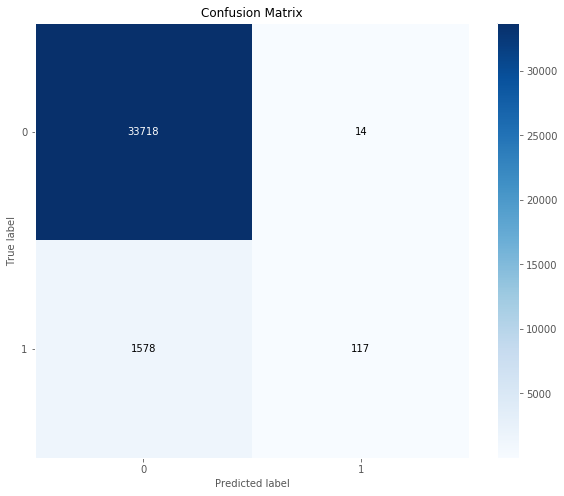

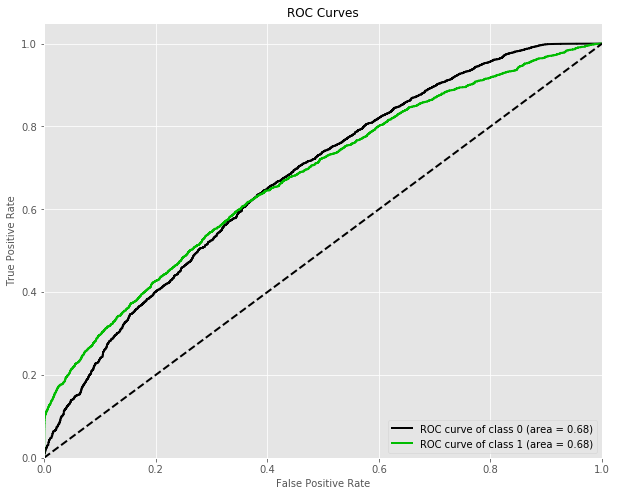

In [187]:
import scikitplot as skplt
predictions = randomSearch.predict(testing.drop(columns=['flu_flag','DUPERSID']))
predictions_probs = randomSearch.predict_proba(testing.drop(columns=['flu_flag','DUPERSID']))
print("Misclassification rate: %f" % (1 - randomSearch.score(testing.drop(columns=['flu_flag','DUPERSID']), testing.flu_flag)))
print("Confusion Matrix")
skplt.metrics.plot_confusion_matrix(testing.flu_flag, predictions, figsize=(10, 8))
skplt.metrics.plot_roc_curve(testing.flu_flag, predictions_probs, curves=('each_class'), figsize=(10, 8))

In [188]:
rf = RandomForestClassifier(max_depth = 33,n_estimators = 354, min_samples_split = 9, min_samples_leaf=4, criterion = 'entropy', n_jobs=-1)
rf = rf.fit(smoteTrainX, smoteTrainY)

Text(0.5,1,'Variable Importance from SMOTE Random Forest Model')

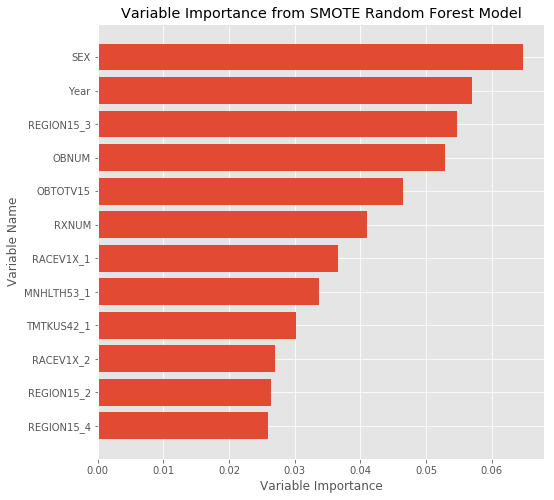

In [189]:
var_importance = pd.DataFrame(xtrain.columns)
var_importance['Importance'] = rf.feature_importances_
var_import = dict(zip(var_importance.sort_values(by=['Importance'], ascending=False)[0], 
                      var_importance.sort_values(by=['Importance'], ascending=False).Importance))
values = list(var_import.values())[0:12]
labels = list(var_import.keys())[0:12]

plt.figure(figsize=(8,8))
plt.barh(range(12),values[::-1])
plt.yticks(range(12),labels[::-1])
plt.ylabel('Variable Name')
plt.xlabel('Variable Importance')
plt.title('Variable Importance from SMOTE Random Forest Model')


#### Gradient Boosting Trees

In [191]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from time import time
from scipy.stats import randint as sp_randint
param_dist = {
    "max_depth": sp_randint(3, 40),
    "learning_rate": sp_randint(0.3, 10),
    "n_estimators": sp_randint(50, 400),
    "min_samples_split": sp_randint(2, 10),
    "min_samples_leaf": sp_randint(2, 10),
}

clf = GradientBoostingClassifier(loss='exponential')
k = StratifiedKFold(n_splits=3)
randomSearch = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=5, n_jobs=-1, cv=k, scoring='f1_weighted', verbose = 1, refit=True)

randomSearch.fit(smoteTrainX, smoteTrainY)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 14.4min remaining: 12.6min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 23.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
          error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe32c91a828>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe30fb657f0>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe32c6c9dd8>, 'min_samples_split': <scipy.stats._dis

In [192]:

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report(randomSearch.cv_results_)

Model with rank: 1
Mean validation score: 0.650 (std: 0.048)
Parameters: {'learning_rate': 8, 'max_depth': 31, 'min_samples_leaf': 9, 'min_samples_split': 9, 'n_estimators': 53}

Model with rank: 2
Mean validation score: 0.541 (std: 0.155)
Parameters: {'learning_rate': 4, 'max_depth': 37, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 157}

Model with rank: 3
Mean validation score: 0.538 (std: 0.086)
Parameters: {'learning_rate': 3, 'max_depth': 17, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 292}



Misclassification rate: 0.121179
Confusion Matrix


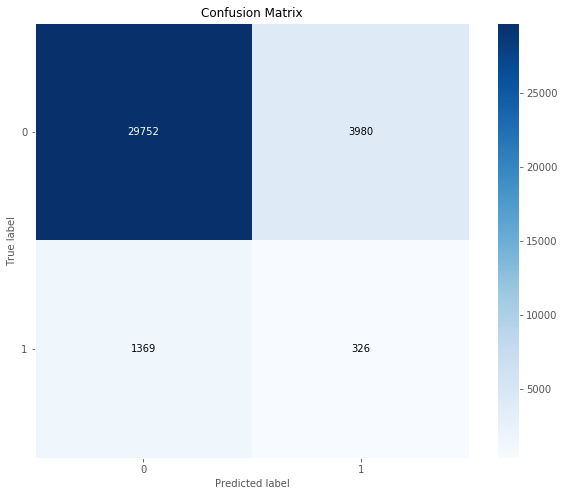

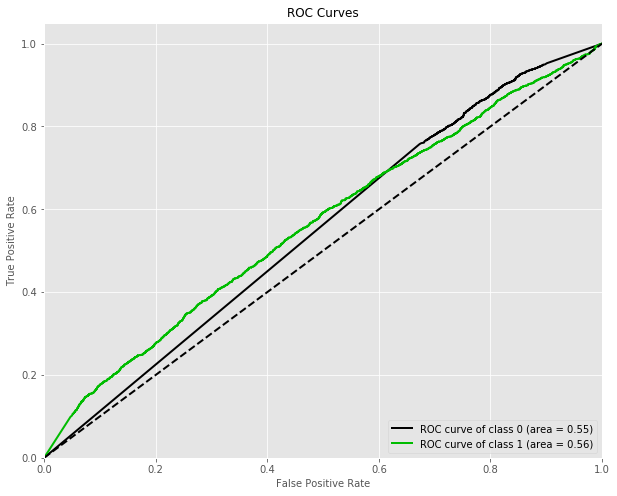

In [193]:

predictions = randomSearch.predict(testing.drop(columns=['flu_flag','DUPERSID']))
predictions_probs = randomSearch.predict_proba(testing.drop(columns=['flu_flag','DUPERSID']))
print("Misclassification rate: %f" % (1 - randomSearch.score(testing.drop(columns=['flu_flag','DUPERSID']), testing.flu_flag)))
print("Confusion Matrix")
skplt.metrics.plot_confusion_matrix(testing.flu_flag, predictions, figsize=(10, 8))
skplt.metrics.plot_roc_curve(testing.flu_flag, predictions_probs, curves=('each_class'), figsize=(10, 8))

#### Simple NN with imputed and SMOTE data 

In [78]:
## This is to define our F-1 metric as Keras as dropped the F-1 metric optimzation
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


import tensorflow as tf


def f2_score(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 5 * precision * recall / (4 * precision + recall)
    f_score = tf.where(tf.is_nan(f_score), tf.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)


Using TensorFlow backend.


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(smoteTrainX)
transTrainX = scaler.transform(smoteTrainX)
transTestX = scaler.transform(testing.drop(columns=['flu_flag','DUPERSID']))

In [81]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Dropout
from keras.layers import LeakyReLU
model = Sequential()
model.add(Dense(512, input_dim=transTrainX.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='uniform', activation='relu'))
model.add(LeakyReLU(alpha=0.5))
model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f2_score])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               39424     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 203,777
Trainable params: 203,777
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.fit(transTrainX,
          smoteTrainY,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_split=0.33)

Train on 137565 samples, validate on 67757 samples
Epoch 1/50
137565/137565 [==============================] - 4s 26us/step - loss: 0.4241 - f2_score: 0.0897 - val_loss: 0.5754 - val_f2_score: 0.6593
Epoch 2/50
137565/137565 [==============================] - 3s 21us/step - loss: 0.3273 - f2_score: 0.1466 - val_loss: 0.5926 - val_f2_score: 0.6857
Epoch 3/50
137565/137565 [==============================] - 3s 21us/step - loss: 0.3032 - f2_score: 0.1558 - val_loss: 0.4654 - val_f2_score: 0.7541
Epoch 4/50
137565/137565 [==============================] - 3s 21us/step - loss: 0.2920 - f2_score: 0.1596 - val_loss: 0.3649 - val_f2_score: 0.8061
Epoch 5/50
137565/137565 [==============================] - 3s 21us/step - loss: 0.2828 - f2_score: 0.1631 - val_loss: 0.3780 - val_f2_score: 0.7904
Epoch 6/50
137565/137565 [==============================] - 3s 22us/step - loss: 0.2741 - f2_score: 0.1665 - val_loss: 0.2862 - val_f2_score: 0.8398
Epoch 7/50
137565/137565 [=============================

In [ ]:
predictions = model.predict_classes(transTestX, batch_size=128)
predictions_probs = model.predict_proba(transTestX, batch_size=128)
print("Confusion Matrix")
skplt.metrics.plot_confusion_matrix(testing.flu_flag, predictions, figsize=(10, 8))


fpr, tpr, _ = roc_curve(testing.flu_flag, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### $l_2$ Regularized Logistic Regression

In [ ]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegressionCV

CScores = np.logspace(0.0001, 3.5, 100, endpoint=True)
LRCV = LogisticRegressionCV(
    Cs=CScores,
    n_jobs=-1,
    solver='sag',
    penalty='l2',
    scoring='f1_weighted',
    cv=5,
    random_state=100)
bestLRCV = LRCV.fit(smoteTrainX, smoteTrainY)

In [ ]:
predictions = bestLRCV.predict(testing.drop(columns=['flu_flag','DUPERSID']))
predictions_probs = bestLRCV.predict_proba(testing.drop(columns=['flu_flag','DUPERSID']))
print("Misclassification rate: %f" % (1 - bestLRCV.score(testing.drop(columns=['flu_flag','DUPERSID']),testing.flu_flag )))
print("Confusion Matrix")
skplt.metrics.plot_confusion_matrix(testing.flu_flag, predictions, figsize=(10, 8))
skplt.metrics.plot_roc_curve(testing.flu_flag, predictions_probs, curves=('each_class'), figsize=(10, 8))

### In the interests of running time, we will not be showing the performance of the code above but just rather show the best parameter from a previous run

Misclassification rate: 0.414232
Confusion Matrix


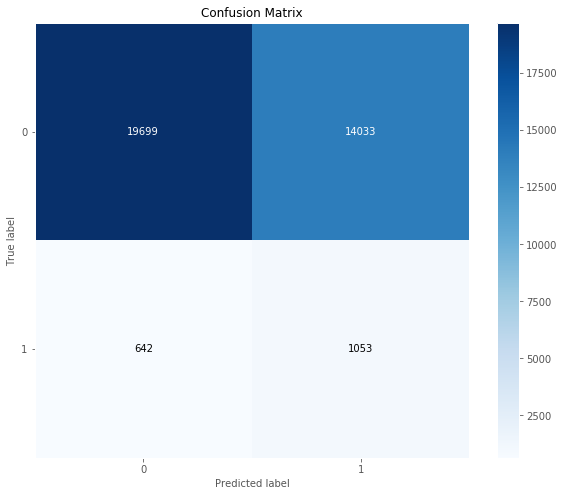

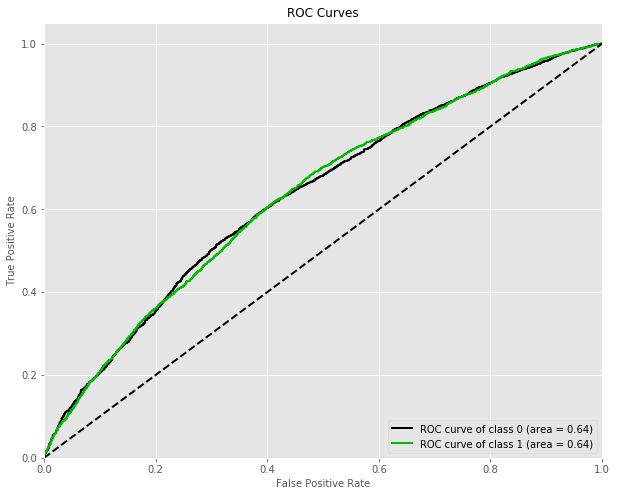

In [197]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=68.93365609,n_jobs=-1)
lr.fit(smoteTrainX, smoteTrainY)
predictions = lr.predict(testing.drop(columns=['flu_flag','DUPERSID']))
predictions_probs = lr.predict_proba(testing.drop(columns=['flu_flag','DUPERSID']))
print("Misclassification rate: %f" % (1 - lr.score(testing.drop(columns=['flu_flag','DUPERSID']),testing.flu_flag )))
print("Confusion Matrix")
skplt.metrics.plot_confusion_matrix(testing.flu_flag, predictions, figsize=(10, 8))
skplt.metrics.plot_roc_curve(testing.flu_flag, predictions_probs, curves=('each_class'), figsize=(10, 8))

### Try Penalized SVMs

In [198]:
#using stochastic gradient descent
import scikitplot as skplt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
param_dist = {
"alpha": np.logspace(0.00001, 20, 60, endpoint=True),
}


k = StratifiedKFold(n_splits=10)
clf = SGDClassifier(n_jobs=-1, l1_ratio=0, max_iter=1000)
gridSearch = GridSearchCV(clf, param_grid=param_dist,  n_jobs=-1, cv=k, scoring='f1_weighted', refit=True)

gridSearch.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0, learning_rate='optimal',
       loss='hinge', max_iter=1000, n_iter=None, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': array([1.00002e+00, 2.18269e+00, 4.76404e+00, 1.03982e+01, 2.26956e+01,
       4.95364e+01, 1.08120e+02, 2.35988e+02, 5.15078e+02, 1.12423e+03,
       2.45380e+03, 5.35577e+03, 1.16897e+04, 2.55145e+04, 5.56891e+04,
       1.21550e+05, 2.65299e+05, 5.79054e+05, 1.26387e+06, 2.75... 9.24917e+17, 2.01876e+18,
       4.40624e+18, 9.61726e+18, 2.09911e+19, 4.58160e+19, 1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weigh

In [199]:
gridSearch.best_estimator_

SGDClassifier(alpha=235.98813576584536, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

Confusion Matrix


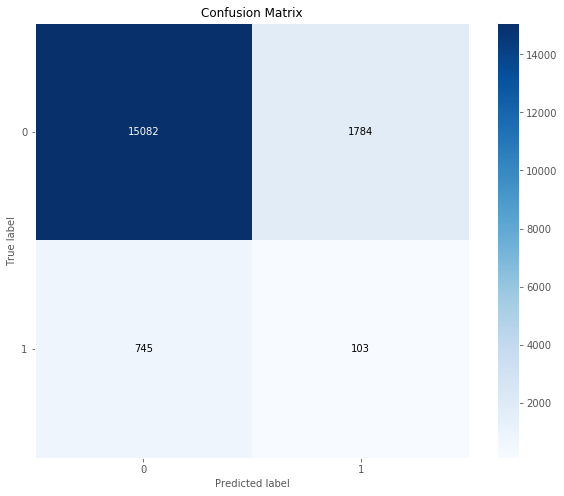

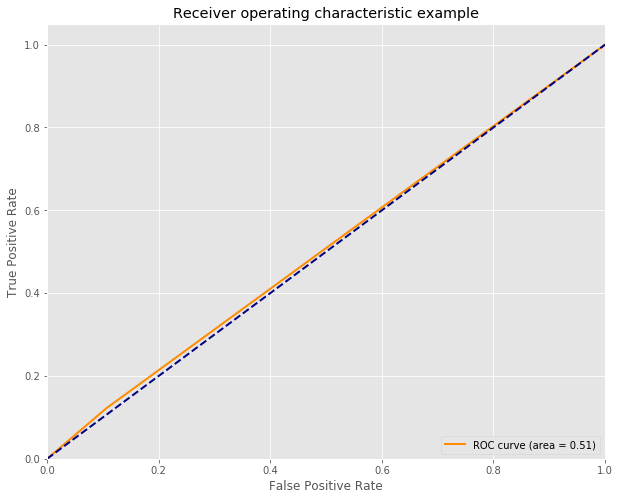

In [200]:

predictions = gridSearch.predict(X_test)
print("Confusion Matrix")
skplt.metrics.plot_confusion_matrix(y_test, predictions, figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = gridSearch.predict(testing.drop(columns=['flu_flag','DUPERSID']))
print("Misclassification rate: %f" % (1 - gridSearch.score(testing.drop(columns=['flu_flag','DUPERSID']), testing.flu_flag)))
print("Confusion Matrix")
skplt.metrics.plot_confusion_matrix(testing.flu_flag, predictions, figsize=(10, 8))
fpr, tpr, _ = roc_curve(testing.flu_flag, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## Ensemble Methods

In [201]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import scikitplot as skplt

In [202]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(max_depth = 63,n_estimators = 380, criterion = 'entropy', n_jobs=-1)
svm = SVC(C=1.8051267096011283, kernel='linear', probability=True, max_iter=1000)
lr = LogisticRegression(C=68.93365609,n_jobs=-1)
gbt = GradientBoostingClassifier(n_estimators=221, max_depth=35, learning_rate=7)

In [204]:
svm = svm.fit(smoteTrainX,smoteTrainY)
rf = rf.fit(smoteTrainX, smoteTrainY)
lr = lr.fit(smoteTrainX, smoteTrainY)
gbt = gbt.fit(smoteTrainX, smoteTrainY)

In [205]:
eclf = VotingClassifier(estimators=[('rf', rf), ('svm', svm), ('lr', lr), ('gbt', gbt)], voting='soft', n_jobs=-1)
eclf.fit(smoteTrainX, smoteTrainY)


Misclassification rate: 0.121151


Confusion Matrix


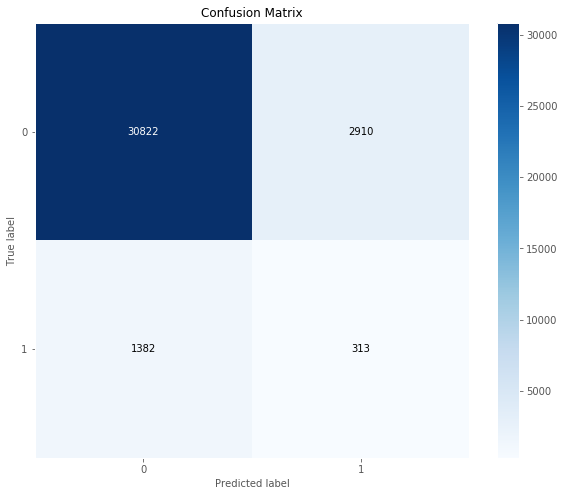

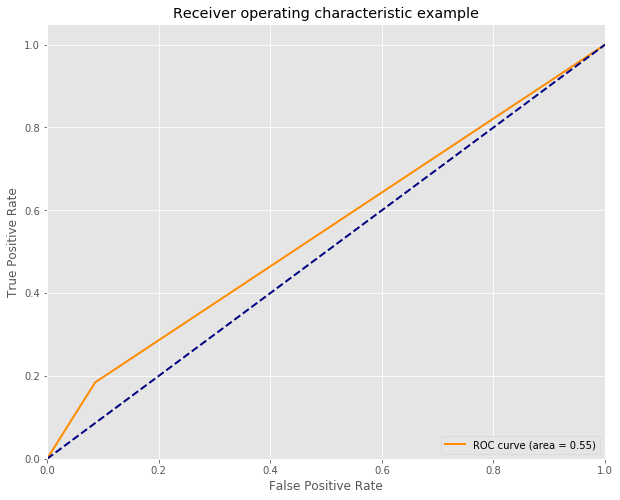

In [206]:
predictions = eclf.predict(testing.drop(columns=['flu_flag','DUPERSID']))
predictions_probs = eclf.predict_proba(testing.drop(columns=['flu_flag', 'DUPERSID']))
print("Misclassification rate: %f" % (1 - eclf.score(testing.drop(columns=['flu_flag','DUPERSID']), testing.flu_flag)))

print("Confusion Matrix")
skplt.metrics.plot_confusion_matrix(testing.flu_flag, predictions, figsize=(10, 8))
skplt.metrics.plot_roc_curve(testing.flu_flag, predictions_probs, curves=('each_class'), figsize=(10, 8))
